# L1 vs L2 Regularization
Ok, but what is now better, $L_1$- or $L_2$-norm regularization? We will make an illustration of the regression solutions when we penalize with $L_1$- and $L_2$-norm. To make that illustration, using the constrained objective formulation is more suitable than the penalized one. As discussed in the **Sparse Regression** section, we can transform the penalized objective into a constrained one and vice versa.  

That is, for every $\lambda>0$ there exists a radius $s>0$ and vice versa, such that the following optimization problems are equivalent: 
\begin{align}
        \min &\lVert \vvec{y}-X\bm{\beta}\rVert^2 + \lambda \lVert\bm{\beta}\rVert^2 & \text{s.t. }\bm{\beta}\in\mathbb{R}^p  \\
        \min &\lVert \vvec{y}-X\bm{\beta}\rVert^2 & \text{s.t. } \lVert\bm{\beta}\rVert^2\leq s^2,\bm{\beta}\in\mathbb{R}^p  \\
\end{align}

Similarly, for every $\lambda>0$ there exists a radius $s>0$ and vice versa, such that the following optimization problems are equivalent: 
\begin{align}
        \min &\lVert \vvec{y}-X\bm{\beta}\rVert^2 + \lambda \lvert\bm{\beta}\rvert & \text{s.t. }\bm{\beta}\in\mathbb{R}^p  \\
        \min &\lVert \vvec{y}-X\bm{\beta}\rVert^2 & \text{s.t. } \lvert\bm{\beta}\rvert\leq s,\bm{\beta}\in\mathbb{R}^p  \\
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(6,2) #random design matrix
y = np.random.rand(6,1)+np.random.uniform(0,2) #random targets, biased towards positive values
β_opt = np.linalg.inv(X.T@X)@X.T@y
delta = 0.025
cx = np.arange(-1.5, 4.0, delta)
cy = np.arange(-1.5, 4.0, delta)
xx, yy = np.meshgrid(cx, cy)
B = np.array([xx,yy]).reshape(2,cx.shape[0]*cy.shape[0]) #matrix of beta coordinates
Z = 0.5*np.sum((X@B - y)**2,0) #compute rss for each beta coordinate
Z = Z.reshape(cy.shape[0],cx.shape[0])

In [2]:
import matplotlib.patches as patches
s=1
levels = np.array([0.1,1,2.5,5,10,15,30,60]) #levels of the contour plot

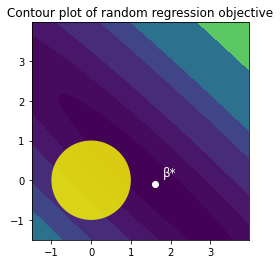

In [3]:
fig, ax = plt.subplots()
CS = ax.contourf(xx, yy, Z,levels=levels)
ax.plot(β_opt[0], β_opt[1], "wo")
ax.annotate("β*", (β_opt[0]+0.2, β_opt[1]+0.2), fontsize=12, color="white")

circ = patches.Circle((0, 0), s, alpha=0.8, fc='yellow')
ax.add_patch(circ)
ax.set_title('Contour plot of random regression objective')
plt.axis('scaled')
plt.show()

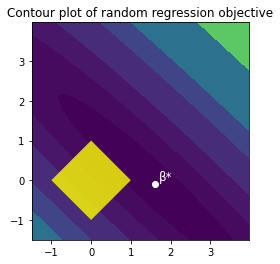

In [4]:
fig, ax = plt.subplots()
CS = ax.contourf(xx, yy, Z, levels=levels)
ax.plot(β_opt[0], β_opt[1], "wo")
ax.annotate("β*", (β_opt[0]+0.1, β_opt[1]+0.1), fontsize=12, color="white")

circ = patches.Polygon(np.array([[s,0],[0,s],[-s,0],[0,-s]]), closed=True, alpha=0.8, fc='yellow')
ax.add_patch(circ)
ax.set_title('Contour plot of random regression objective')
plt.axis('scaled')
plt.show()

In summary, we considered the ridge regression objective
\begin{align}
        \min_{\bm\beta\in\mathbb{R}^p} RSS_{L_2}(\bm{\beta}) = \lVert \vvec{y}-X\bm{\beta}\rVert^2 + \lambda\lVert\bm{\beta}\rVert^2
\end{align}
and the Lasso
\begin{align}
    \min_{\bm\beta\in\mathbb{R}^p} RSS_{L_1}(\bm{\beta}) = \lVert \vvec{y}-X\bm{\beta}\rVert^2 + \lambda\lvert\bm{\beta}\rvert
\end{align}
The solution of Ridge Regression is computable very fast, analyically. The Ridge Regression minimizer is uniquely defined, but usually not sparse.
Lasso is optimized with coordinate descent, which is a theoretically well-founded optimization procedure. Lasso regression is more likely to return sparse regression vectors $\bm\beta$.
